### Feature Scaling Example

You have now seen how feature scaling might change the clusters we obtain from the kmeans algorithm, but it is time to try it out!

First let's get some data to work with.  The first cell here will read in the necessary libraries, generate data, and make a plot of the data you will be working with throughout the rest of the notebook.

The dataset you will work with through the notebook is then stored in **data**.  

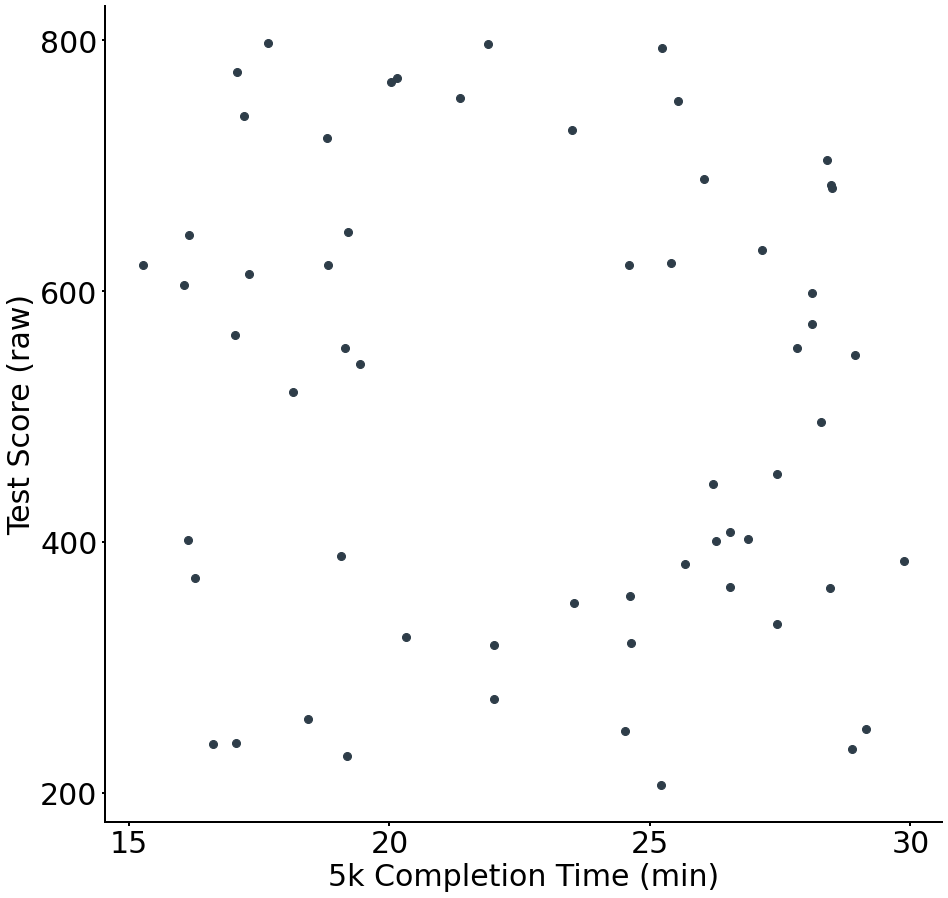

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from IPython.display import Image
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
import tests2 as t


%matplotlib inline

# DSND colors: UBlue, Salmon, Gold, Slate
plot_colors = ['#02b3e4', '#ee2e76', '#ffb613', '#2e3d49']

# Light colors: Blue light, Salmon light
plot_lcolors = ['#88d0f3', '#ed8ca1', '#fdd270']

# Gray/bg colors: Slate Dark, Gray, Silver
plot_grays = ['#1c262f', '#aebfd1', '#fafbfc']


def create_data():
    n_points = 120
    X = np.random.RandomState(3200000).uniform(-3, 3, [n_points, 2])
    X_abs = np.absolute(X)

    inner_ring_flag = np.logical_and(X_abs[:,0] < 1.2, X_abs[:,1] < 1.2)
    outer_ring_flag = X_abs.sum(axis = 1) > 5.3
    keep = np.logical_not(np.logical_or(inner_ring_flag, outer_ring_flag))

    X = X[keep]
    X = X[:60] # only keep first 100
    X1 = np.matmul(X, np.array([[2.5, 0], [0, 100]])) + np.array([22.5, 500])
    
    
    plt.figure(figsize = [15,15])

    plt.scatter(X1[:,0], X1[:,1], s = 64, c = plot_colors[-1])

    plt.xlabel('5k Completion Time (min)', size = 30)
    plt.xticks(np.arange(15, 30+5, 5), fontsize = 30)
    plt.ylabel('Test Score (raw)', size = 30)
    plt.yticks(np.arange(200, 800+200, 200), fontsize = 30)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    [side.set_linewidth(2) for side in ax.spines.values()]
    ax.tick_params(width = 2)
    plt.savefig('C18_FeatScalingEx_01.png', transparent = True)
    
    
    data = pd.DataFrame(X1)
    data.columns = ['5k_Time', 'Raw_Test_Score']
    
    return data

data = create_data()

`1.` Take a look at the dataset.  Are there any missing values?  What is the average completion time?  What is the average raw test score?  Use the cells below to find the answers to these questions, and the dictionary to match values and check against our solution.

In [ ]:
# cell for work


In [ ]:
# another cell for work


In [ ]:
# Use the dictionary to match the values to the corresponding statements
a = 0
b = 60
c = 22.9
d = 4.53
e = 511.7

q1_dict = {
'number of missing values': # letter here,
'the mean 5k time in minutes': # letter here,    
'the mean test score as a raw value': # letter here,
'number of individuals in the dataset': # letter here
}

# check your answer against ours here
t.check_q1(q1_dict)

`2.` Now, instantiate a kmeans `model` with 2 cluster centers.  Use your model to `fit` and `predict` the the group of each point in your dataset.  Store the predictions in `preds`.  If you correctly created the model and predictions, you should see a top (blue) cluster and bottom (pink) cluster when running the following cell.

In [ ]:
model = # instantiate a model with two centers
preds = # fit and predict

In [ ]:
# Run this to see your results

def plot_clusters(data, preds, n_clusters):
    plt.figure(figsize = [15,15])

    for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
        my_members = (preds == k)
        plt.scatter(data['5k_Time'][my_members], data['Raw_Test_Score'][my_members], s = 64, c = col)

    plt.xlabel('5k Completion Time (min)', size = 30)
    plt.xticks(np.arange(15, 30+5, 5), fontsize = 30)
    plt.ylabel('Test Score (raw)', size = 30)
    plt.yticks(np.arange(200, 800+200, 200), fontsize = 30)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    [side.set_linewidth(2) for side in ax.spines.values()]
    ax.tick_params(width = 2)
    
plot_clusters(data, preds, 2)

`3.` Now create two new columns to add to your `data` dataframe.  The first is `test_scaled`, which you should create by subtracting the mean test score and dividing by the standard deviation test score.  

The second column to create is `5k_time_sec`, which should have the minutes changed to seconds.

In [ ]:
# your work here
data['test_scaled'] = # standardized test scores
data['5k_time_sec'] = # times in seconds

`4.` Now, similar to what you did in question 2, instantiate a kmeans `model` with 2 cluster centers.  Use your model to `fit` and `predict` the the group of each point in your dataset.  Store the predictions in `preds`.  If you correctly created the model and predictions, you should see a right (blue) cluster and left (pink) cluster when running the following cell.

In [ ]:
model = # instantiate a model with two centers
preds = # fit and predict

In [ ]:
# Run this to see your results
plot_clusters(data, preds, 2)

`5.` Match the variable that best describes the way you should think of feature scaling with algorithms that use distance based metrics or regularization.

In [ ]:
# options
a = 'We should always use normalizing'
b = 'We should always scale our variables between 0 and 1.'
c = 'Variable scale will frequently influence your results, so it is important to standardize for all of these algorithms.'
d = 'Scaling will not change the results of your output.'

best_option = # best answer variable here


# check your answer against ours here
t.check_q5(best_option)

###  If you get stuck, you can find the solution "Feature Scaling Example - Solution" by pushing the orange icon in the top left of this notebook.